<a href="https://colab.research.google.com/github/zoe-weinstein/ENVIR-458/blob/main/Homework6_Weinstein.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.stats import linregress
import urllib.request

In [44]:
# Download the dataset
url = "https://downloads.psl.noaa.gov/Datasets/ghcncams/air.mon.mean.nc"
savename = url.split("/")[-1]
urllib.request.urlretrieve(url, savename)

# Open dataset
ds = xr.open_dataset(savename)
print(ds)  # Check dataset structure

# Extract temperature data
ta = ds["air"]

<xarray.Dataset> Size: 960MB
Dimensions:  (lat: 360, lon: 720, time: 926)
Coordinates:
  * lat      (lat) float32 1kB 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 3kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 7kB 1948-01-01 1948-02-01 ... 2025-02-01
Data variables:
    air      (time, lat, lon) float32 960MB ...
Attributes:
    title:          NOAA/NCEP GHCN CAMS Monthly Temperature
    Conventions:    CF-1.0
    Source:         http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP/.CPC/....
    version:        3.01
    history:        created 8/2012 by CAS NOAA/ESRL PSDupdated to include maj...
    dataset_title:  Climate Prediction Center (CPC) Global Land Surface Air T...
    References:     https://www.psl.noaa.gov/data/gridded/data.ghcncams.html


Step 1. Calculate the global (both area-weighted and not weighted) annual mean temperature in Celsius (TA) from 1990 to 2020 using the same air temperature data provided in the lecture note. (4 pts)

In [45]:
# Extract temperature data and convert from Kelvin to Celsius
ta = ds["air"] - 273.15

# Select data from 1990 to 2020
ta_filtered = ta.sel(time=slice("1990-01-01", "2020-12-01"))

# Ensure lat and lon are available and correctly aligned
lat = ds["lat"]
lon = ds["lon"]

# Compute annual mean temperature
ta_annual = ta_filtered.resample(time="Y").mean()

# Compute unweighted global mean
ta_unweighted = ta_annual.mean(dim=["lat", "lon"])

# Compute area-weighted global mean
weights = np.cos(np.deg2rad(lat))
weights /= weights.mean()  # Normalize weights

# Apply the weights along lat and lon dimensions
ta_weighted = (ta_annual * weights).sum(dim=["lat", "lon"]) / weights.sum()


print(ta_unweighted)

print(ta_weighted)

/usr/local/lib/python3.11/dist-packages/xarray/groupers.py:487: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


<xarray.DataArray 'air' (time: 31)> Size: 124B
array([ 8.785168 ,  8.714317 ,  8.3229885,  8.499462 ,  8.627416 ,
        9.096365 ,  8.573146 ,  8.85324  ,  9.191141 ,  8.96312  ,
        8.927566 ,  9.134132 ,  9.238192 ,  9.298107 ,  8.997143 ,
        9.482438 ,  9.320456 ,  9.469764 ,  9.203374 ,  9.148742 ,
        9.518095 ,  9.320801 ,  9.315943 ,  9.309936 ,  9.408289 ,
        9.709817 ,  9.979748 ,  9.752737 ,  9.447476 ,  9.871853 ,
       10.047581 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 248B 1990-12-31 1991-12-31 ... 2020-12-31
<xarray.DataArray (time: 31)> Size: 124B
array([2869.2664, 2848.3308, 2784.8818, 2803.8928, 2838.737 , 2907.4858,
       2818.933 , 2874.384 , 2957.1704, 2904.617 , 2881.8772, 2930.0256,
       2951.9475, 2952.103 , 2918.    , 2982.074 , 2958.346 , 2981.472 ,
       2931.2563, 2941.5889, 2998.3066, 2942.7905, 2955.277 , 2968.2424,
       2978.972 , 3045.3616, 3073.2764, 3041.7144, 2995.8806, 3065.9102,
       3086.574 ], d

Step 2. Visualize the time series of the global annual mean temperature (weighted and not weighted) from the first step with different colors/line styles (up to you, but we must see the difference between these two data). x axis is year and y axis is TA. Add trend lines with fitted linear regression functions (TA = a*year+b) to the chart. (3 pts)

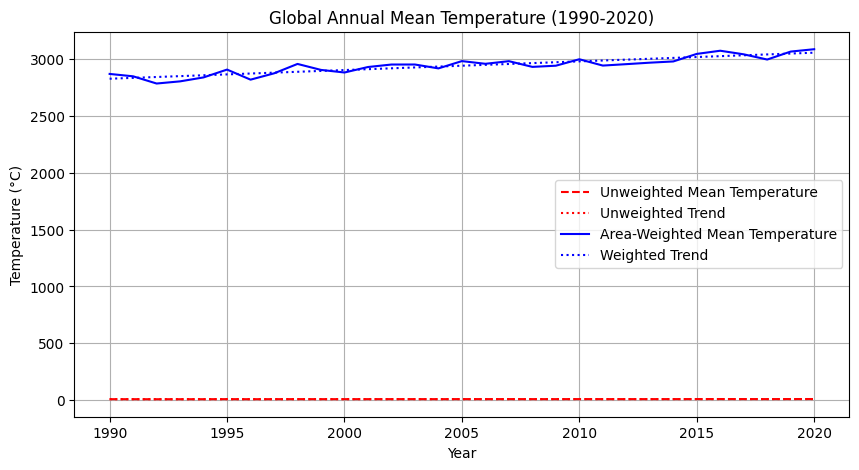

In [46]:
years = ta_unweighted.time.dt.year.values

ta_unweighted_vals = ta_unweighted.values
ta_weighted_vals = ta_weighted.values

#  linear regression for both datasets
slope_uw, intercept_uw, _, _, _ = linregress(years, ta_unweighted_vals)
slope_w, intercept_w, _, _, _ = linregress(years, ta_weighted_vals)

# Generate fitted trend lines
trend_unweighted = slope_uw * years + intercept_uw
trend_weighted = slope_w * years + intercept_w

# Plot the time series and trend lines
plt.figure(figsize=(10, 5))

# Unweighted Temperature (Red, Dashed)
plt.plot(years, ta_unweighted_vals, label="Unweighted Mean Temperature", linestyle="dashed", color="red")
plt.plot(years, trend_unweighted, linestyle="dotted", color="red", label="Unweighted Trend")

# Weighted Temperature (Blue, Solid)
plt.plot(years, ta_weighted_vals, label="Area-Weighted Mean Temperature", linestyle="solid", color="blue")
plt.plot(years, trend_weighted, linestyle="dotted", color="blue", label="Weighted Trend")

# Labels and Title
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Global Annual Mean Temperature (1990-2020)")
plt.legend()
plt.grid()

# Show the plot
plt.show()

Step 3. Visualize area-weighted and unweighted 31-year mean global air temperature map in robinson projection with colorbar in two panels in the same figure. (3 pts)

AttributeError: 'DataArray' object has no attribute 'lon'

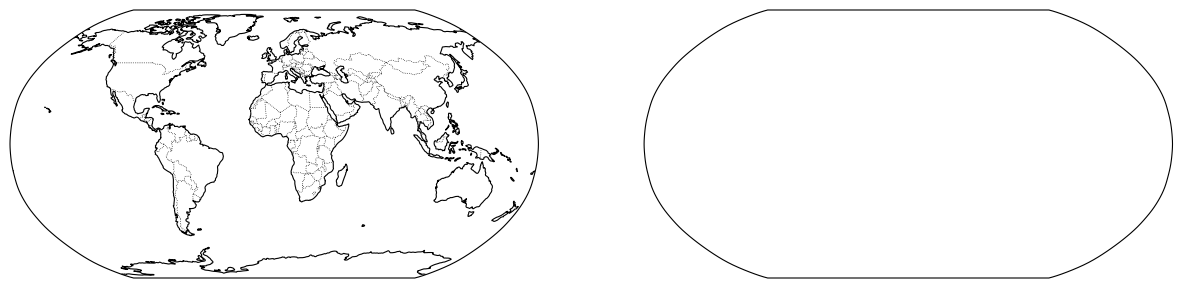

In [47]:
def plot_temperature_maps(ta_unweighted_mean, ta_weighted_mean):
    # Create figure and axis objects with Robinson projection
    fig, axes = plt.subplots(1, 2, subplot_kw={'projection': ccrs.Robinson()}, figsize=(15, 7))

    # Define titles and datasets for each subplot
    datasets = [ta_unweighted_mean, ta_weighted_mean]
    titles = ["Unweighted 31-Year Mean Temperature", "Area-Weighted 31-Year Mean Temperature"]

    for ax, title, data in zip(axes, titles, datasets):
        ax.set_global()  # Show the full globe
        ax.add_feature(cfeature.COASTLINE, linewidth=0.8)  # Add coastlines
        ax.add_feature(cfeature.BORDERS, linewidth=0.5, linestyle="dotted")  # Add country borders

        # Plot data using pcolormesh
        img = ax.pcolormesh(data.lon, data.lat, data,
                            transform=ccrs.PlateCarree(), cmap="coolwarm")

        ax.set_title(title, fontsize=12)  # Set title for each panel

    # Add colorbar
    cbar = fig.colorbar(img, ax=axes, orientation="horizontal", pad=0.05, aspect=50)
    cbar.set_label("Temperature (°C)")

    # Show the plot
    plt.show()

# Call the function to plot the maps
plot_temperature_maps(ta_unweighted_mean, ta_weighted_mean)
